# Python and Friends

This is a very quick run-through of some python syntax

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

## The Python Language

Lets talk about using Python as a calculator...

In [2]:
1+2

3

Notice integer division and floating-point error below!

In [9]:
a=1/2,1.0/2.0,3*3.2
print a
type(a)

(0, 0.5, 9.600000000000001)


tuple

Here is how we can print things. Something on the last line by itself is returned as the output value.

In [11]:
print 1+3.0, "\n",5/3.0
5/3

4.0 
1.66666666667


1

We can obtain the type of a variable, and use boolean comparisons tontest these types.

In [5]:
a=5.0/6.0
print(a)
print type(a)

0.833333333333
<type 'float'>


In [13]:
import types
type(a) is types.FloatType

False

In [14]:
type(a) == types.IntType

False

## Python and Iteration (and files)

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

But first, lets introduce the notion of a comprehension. Its a way of constructing a list

In [13]:
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

Python has some nifty functions like `enumerate` and `zip`. The former gives a list of tuples with each tuple of the form `(index, value)`, while the latter takes elements from each list and outs them together into a tuple, thus creating a list of tuples. The first is a duck, but the second isnt.

In [19]:
enumerate(asquaredlist),zip(alist, asquaredlist)

(<enumerate at 0x10ec1d3c0>, [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)])

In [22]:
newlist=enumerate(asquaredlist)
newlist

Someone realized that design flaw and created izip.

In [4]:
from itertools import izip
izip(alist, asquaredlist)

I **don't** understand what the "design flaw" is. From the stackexchange we learn that izip is not a list object, so we cannot do things we usually do on lists. For example:

In [32]:
zip(alist, asquaredlist)[1:4]

[(2, 4), (3, 9), (4, 16)]

In [34]:
izip(alist, asquaredlist)[1:4]

TypeError: 'itertools.izip' object has no attribute '__getitem__'

However, there is an important difference between `izip` and `zip` that makes the former useful in some contexts. While `zip` is evaluated all at once, elements of `izip` are iterated on only when izip is called. Thus if we have a very long list of elements, and we need to iterate up to the nth tuple made up of these lists, `for i,j in izip(...)` doesn't take as much space as `for i,j in zip(...)[n]`

In [40]:
print enumerate(asquaredlist)

In [41]:
[k for k in enumerate(asquaredlist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

Open files behave like lists too! Here we get each line in the file and find its length, using the comprehension syntax to put these lengths into a big list.

In [44]:
linelengths=[len(line) for line in open("hamlet.txt")]#poor code as we dont close the file
print linelengths

[9, 27, 2, 24, 2, 2, 2, 2, 22, 2, 28, 60, 29, 28, 27, 22, 22, 24, 25, 18, 24, 11, 21, 20, 22, 32, 10, 28, 31, 12, 22, 27, 2, 51, 32, 2, 67, 13, 2, 18, 2, 2, 2, 8, 2, 50, 2, 49, 2, 6, 14, 2, 7, 45, 2, 6, 21, 2, 7, 11, 2, 6, 5, 2, 7, 41, 2, 6, 53, 2, 7, 48, 25, 2, 6, 27, 2, 7, 23, 2, 6, 19, 39, 46, 2, 7, 48, 2, 32, 2, 6, 25, 2, 6, 27, 2, 7, 22, 2, 6, 30, 24, 2, 7, 24, 22, 2, 9, 2, 6, 18, 2, 6, 6, 25, 2, 6, 17, 2, 6, 45, 2, 6, 47, 2, 6, 22, 2, 6, 36, 42, 48, 38, 45, 37, 42, 2, 6, 32, 2, 6, 18, 41, 42, 31, 2, 6, 20, 41, 2, 6, 20, 51, 51, 43, 30, 2, 6, 51, 2, 23, 2, 6, 48, 2, 6, 43, 2, 6, 47, 2, 6, 49, 2, 6, 23, 2, 6, 23, 2, 6, 50, 42, 40, 54, 2, 6, 17, 2, 6, 22, 2, 6, 42, 2, 15, 2, 6, 33, 2, 6, 46, 42, 22, 2, 6, 41, 38, 19, 2, 6, 26, 2, 6, 25, 36, 40, 45, 42, 15, 2, 6, 48, 47, 2, 6, 48, 44, 48, 2, 6, 49, 47, 43, 43, 41, 50, 43, 46, 50, 30, 2, 6, 13, 47, 42, 44, 45, 53, 53, 53, 36, 50, 45, 39, 43, 35, 50, 39, 49, 36, 47, 41, 39, 48, 42, 39, 46, 45, 41, 50, 44, 2, 6, 37, 47, 49, 45, 2, 6, 41

Note that opened files behave like lists only insofar as we can iterate over them. For example, we cannot easily get their elements (if they were lists -- see below for the correct way to get their elements):

In [55]:
open('hamlet.txt')[1]

TypeError: 'file' object has no attribute '__getitem__'

Instead we have to 'work around' this problem, for example in this way (where we also learn that we need some cleaning):

In [12]:
lines=[i for i in open('hamlet.txt')]
lines[0:10]

['\xef\xbb\xbfXXXX\r\n',
 'HAMLET, PRINCE OF DENMARK\r\n',
 '\r\n',
 'by William Shakespeare\r\n',
 '\r\n',
 '\r\n',
 '\r\n',
 '\r\n',
 'PERSONS REPRESENTED.\r\n',
 '\r\n']

In [48]:
help(open)

Help on built-in function open in module __builtin__:

open(...)
    open(name[, mode[, buffering]]) -> file object
    
    Open a file using the file() type, returns a file object.  This is the
    preferred way to open a file.  See file.__doc__ for further information.



In [14]:
sum(linelengths), np.mean(linelengths), np.median(linelengths), np.std(linelengths)

(180718, 26.69394387001477, 26.0, 21.029872021427462)

But perhaps we want to access Hamlet word by word and not line by line

In [6]:
hamletfile=open("hamlet.txt")
hamlettext=hamletfile.read()
hamletfile.close()
hamlettokens=hamlettext.split()#split with no arguments splits on whitespace
len(hamlettokens)

31659

Note the method we used above to define `lines` gets eachs of the lines separately. In contrast `doc.read()` gets the whole content of `doc` as a single lonely string. But, we can use split to get each of the lines in `lines`. We check this below.

In [69]:
hamlettext

"\xef\xbb\xbfXXXX\r\nHAMLET, PRINCE OF DENMARK\r\n\r\nby William Shakespeare\r\n\r\n\r\n\r\n\r\nPERSONS REPRESENTED.\r\n\r\nClaudius, King of Denmark.\r\nHamlet, Son to the former, and Nephew to the present King.\r\nPolonius, Lord Chamberlain.\r\nHoratio, Friend to Hamlet.\r\nLaertes, Son to Polonius.\r\nVoltimand, Courtier.\r\nCornelius, Courtier.\r\nRosencrantz, Courtier.\r\nGuildenstern, Courtier.\r\nOsric, Courtier.\r\nA Gentleman, Courtier.\r\nA Priest.\r\nMarcellus, Officer.\r\nBernardo, Officer.\r\nFrancisco, a Soldier\r\nReynaldo, Servant to Polonius.\r\nPlayers.\r\nTwo Clowns, Grave-diggers.\r\nFortinbras, Prince of Norway.\r\nA Captain.\r\nEnglish Ambassadors.\r\nGhost of Hamlet's Father.\r\n\r\nGertrude, Queen of Denmark, and Mother of Hamlet.\r\nOphelia, Daughter to Polonius.\r\n\r\nLords, Ladies, Officers, Soldiers, Sailors, Messengers, and other\r\nAttendants.\r\n\r\nSCENE. Elsinore.\r\n\r\n\r\n\r\nACT I.\r\n\r\nScene I. Elsinore. A platform before the Castle.\r\n\r\n[Fra

In [10]:
lines2=hamlettext.split('\n')
lines2[0:10]

['\xef\xbb\xbfXXXX\r',
 'HAMLET, PRINCE OF DENMARK\r',
 '\r',
 'by William Shakespeare\r',
 '\r',
 '\r',
 '\r',
 '\r',
 'PERSONS REPRESENTED.\r',
 '\r']

In [13]:
lines == lines2

False

The reason `lines` equals not `lines2` is that `split()` has stripped the `\n` line breaks from each string. Below we restore it and see that the result equals `lines`. Note that we also remove the extra last element of `lines2`, not present in `lines`.

In [138]:
lines3=[item+'\n' for item in lines2]
lines3.pop()
lines3[0:10]

['\xef\xbb\xbfXXXX\r\n',
 'HAMLET, PRINCE OF DENMARK\r\n',
 '\r\n',
 'by William Shakespeare\r\n',
 '\r\n',
 '\r\n',
 '\r\n',
 '\r\n',
 'PERSONS REPRESENTED.\r\n',
 '\r\n']

In [139]:
len(lines),len(lines3)

(6770, 6770)

In [140]:
lines == lines3

True

In [14]:
lines is lines3

NameError: name 'lines3' is not defined

Note that `==` gives `True` while `is` gives `False`. The reason is that `a is b` is `True` only if both `a` and `b` point to the same object, i.e. if `a = b` has been declared beforehand. On the other hand, `a == b` is `True` as long as `a` and `b` have the same values.

One can use the `with` syntax which cretaes a context. The file closing is then done automatically for us.

In [13]:
with open("hamlet.txt") as hamletfile:
    hamlettext=hamletfile.read()
    hamlettokens=hamlettext.split()
    print len(hamlettokens)

31659


There are roughly 32,000 words in Hamlet.

Note that `hamlettext` is *not* a list, but a string. It so happens that the methods used to access elements of lists also work for strings.

In [142]:
type(hamlettext)

str

In [154]:
hamlettext[3435],hamlettext[23422:23434]

('T', 'fear me not.')

### The indexing of lists

In [44]:
print hamlettext[:1000]#first 1000 characters from Hamlet.

﻿XXXX
HAMLET, PRINCE OF DENMARK

by William Shakespeare




PERSONS REPRESENTED.

Claudius, King of Denmark.
Hamlet, Son to the former, and Nephew to the present King.
Polonius, Lord Chamberlain.
Horatio, Friend to Hamlet.
Laertes, Son to Polonius.
Voltimand, Courtier.
Cornelius, Courtier.
Rosencrantz, Courtier.
Guildenstern, Courtier.
Osric, Courtier.
A Gentleman, Courtier.
A Priest.
Marcellus, Officer.
Bernardo, Officer.
Francisco, a Soldier
Reynaldo, Servant to Polonius.
Players.
Two Clowns, Grave-diggers.
Fortinbras, Prince of Norway.
A Captain.
English Ambassadors.
Ghost of Hamlet's Father.

Gertrude, Queen of Denmark, and Mother of Hamlet.
Ophelia, Daughter to Polonius.

Lords, Ladies, Officers, Soldiers, Sailors, Messengers, and other
Attendants.

SCENE. Elsinore.



ACT I.

Scene I. Elsinore. A platform before the Castle.

[Francisco at his post. Enter to him Bernardo.]

Ber.
Who's there?

Fran.
Nay, answer me: stand, and u


In [45]:
print hamlettext[-1000:]#and last 1000 characters from Hamlet.

nd, in this upshot, purposes mistook
Fall'n on the inventors' heads: all this can I
Truly deliver.

Fort.
Let us haste to hear it,
And call the noblest to the audience.
For me, with sorrow I embrace my fortune:
I have some rights of memory in this kingdom,
Which now, to claim my vantage doth invite me.

Hor.
Of that I shall have also cause to speak,
And from his mouth whose voice will draw on more:
But let this same be presently perform'd,
Even while men's minds are wild: lest more mischance
On plots and errors happen.

Fort.
Let four captains
Bear Hamlet like a soldier to the stage;
For he was likely, had he been put on,
To have prov'd most royally: and, for his passage,
The soldiers' music and the rites of war
Speak loudly for him.--
Take up the bodies.--Such a sight as this
Becomes the field, but here shows much amiss.
Go, bid the soldiers shoot.

[A dead march.]

[Exeunt, bearing off the dead bodies; after the which a peal of
ordnance is shot off.]



Lets split the word tokens. The first one below reads, give me the second, third, and fourth words (remember that python is 0 indexed). Try and figure what the others mean.

In [16]:
print hamlettokens[1:4], hamlettokens[:4], hamlettokens[0], hamlettokens[-1]

['HAMLET,', 'PRINCE', 'OF'] ['\xef\xbb\xbfXXXX', 'HAMLET,', 'PRINCE', 'OF'] ﻿XXXX off.]


In [17]:
hamlettokens[1:8:2]#get every 2nd world between the 2nd and the 9th: ie 2nd, 4th, 6th, and 8th

['HAMLET,', 'OF', 'by', 'Shakespeare']

In [172]:
testlist=range(1,21)
testlist[0:21:3]

[1, 4, 7, 10, 13, 16, 19]

#### This is important:
`range` and `xrange` get the list of integers up to N. But `xrange` behaves like an **iterator**. The reason for this is that there is no point generating all of a million integers. We can just add 1 to the previous one and save memory. So we trade off storage for computation.

In [18]:
mylist=[]
for i in xrange(10):
    mylist.append(i)
mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

But note that we can still access the elements of `xrange` without seeing (generating?) the full list

In [178]:
xrange(10),type(xrange(10)),xrange(10)[2],xrange(10)[9]

(xrange(10), xrange, 2, 9)

## Dictionaries

These are the bread and butter. You will use them a lot. They even duck like lists. But be careful how.

It seems dictionaries' items do not preserve their input order. Also use `{}` for dictionaries.

In [47]:
adict={'one':1, 'two': 2, 'three': 3}
print [i for i in adict], [(k,v) for k,v in adict.items()], adict.values()

['three', 'two', 'one'] [('three', 3), ('two', 2), ('one', 1)] [3, 2, 1]


Note that `dict.items()` is the best way to get `dict`'s items (instead of iterating). Also, for iterating over items of a dictionary we can use `dict.iteritems()`, `dict.itervalues()`, and `dict.iterkeys()`.

In [23]:
adict.items(),adict.items()==[k for k in adict.items()],adict.items()==[(k,v) for k,v in adict.items()]

([('three', 3), ('two', 2), ('one', 1)], True, True)

In [70]:
[i for i in adict] == adict.keys(), [adict[i] for i in adict] == adict.values()

(True, True)

In [55]:
adict.itervalues(),adict.iterkeys(),adict.iteritems()

(<dictionary-valueiterator at 0x110e52c00>,
 <dictionary-keyiterator at 0x110e52b50>,
 <dictionary-itemiterator at 0x110e52cb0>)

The keys do not have to be strings. From python 2.7 you can use dictionary comprehensions as well

In [17]:
from itertools import izip
mydict ={k:v for (k,v) in zip(alist, asquaredlist)}
mydict2 ={k:v for k,v in izip(alist, asquaredlist)}
mydict, mydict2, mydict == mydict2

({1: 1, 2: 4, 3: 9, 4: 16, 5: 25}, {1: 1, 2: 4, 3: 9, 4: 16, 5: 25}, True)

You can construct then nicely using the function `dict`.

In [46]:
dict(a=1, b=2)

{'a': 1, 'b': 2}

### and conversion to json

In [21]:
import json

In [22]:
s=json.dumps(mydict)
print s

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25}


In [23]:
json.loads(s)

{u'1': 1, u'2': 4, u'3': 9, u'4': 16, u'5': 25}

## Strings

Basically they behave like immutable lists

In [24]:
lastword=hamlettokens[-1]
print(lastword)

off.]


In [25]:
lastword[-2]="k"#cant change a part of a string

TypeError: 'str' object does not support item assignment

List are mutants!

In [58]:
alist=[1,2,3]
print alist
alist[1]='I changed this, oh my!'
print alist

[1, 2, 3]
[1, 'I changed this, oh my!', 3]


In [26]:
lastword[-2]

'.'

You can join a list with a separator to make a string.

In [27]:
wierdstring=",".join(hamlettokens)
wierdstring[:1000]

"\xef\xbb\xbfXXXX,HAMLET,,PRINCE,OF,DENMARK,by,William,Shakespeare,PERSONS,REPRESENTED.,Claudius,,King,of,Denmark.,Hamlet,,Son,to,the,former,,and,Nephew,to,the,present,King.,Polonius,,Lord,Chamberlain.,Horatio,,Friend,to,Hamlet.,Laertes,,Son,to,Polonius.,Voltimand,,Courtier.,Cornelius,,Courtier.,Rosencrantz,,Courtier.,Guildenstern,,Courtier.,Osric,,Courtier.,A,Gentleman,,Courtier.,A,Priest.,Marcellus,,Officer.,Bernardo,,Officer.,Francisco,,a,Soldier,Reynaldo,,Servant,to,Polonius.,Players.,Two,Clowns,,Grave-diggers.,Fortinbras,,Prince,of,Norway.,A,Captain.,English,Ambassadors.,Ghost,of,Hamlet's,Father.,Gertrude,,Queen,of,Denmark,,and,Mother,of,Hamlet.,Ophelia,,Daughter,to,Polonius.,Lords,,Ladies,,Officers,,Soldiers,,Sailors,,Messengers,,and,other,Attendants.,SCENE.,Elsinore.,ACT,I.,Scene,I.,Elsinore.,A,platform,before,the,Castle.,[Francisco,at,his,post.,Enter,to,him,Bernardo.],Ber.,Who's,there?,Fran.,Nay,,answer,me:,stand,,and,unfold,yourself.,Ber.,Long,live,the,king!,Fran.,Bernardo?,Be

Note that in the example below we can only use `join` on strings, hence we convert elemens of `alist` to strings first. Note that the brackets `[...]` are not really necessary in the example below.

In [71]:
" hakuna matata ".join([str(i) for i in alist])

'1 hakuna matata I changed this, oh my! hakuna matata 3'

## Functions

Functions are even more the bread and butter. You'll see them as methods on objects, or standing alone by themselves.

In [4]:
def square(x):
    return(x*x)
def cube(x):
    return x*x*x
square(5),cube(5)

(25, 125)

The arguments of functions are not variables local to the function:

In [5]:
square(x=3),square(3) 

(9, 9)

In [29]:
print square, type(cube)

<function square at 0x109a66500> <type 'function'>


In Python, functions are "first-class". This is just a fancy way of saying, you can pass functions to other functions

In [47]:
def sum_of_anything(x,y,f):
    print x,y,f
    return(f(x) + f(y))
sum_of_anything(3,4,square)

3 4 <function square at 0x109a66500>


25

Python functions can have positional arguments and keyword arguments. Positional arguments are stored in a tuple, and keyword arguments in a dictionary. Note the "starred" syntax

In [110]:
def f(a,b,*posargs,**dictargs):
    print "I got",a,b,posargs, dictargs
    return None
f(1,3,4,5,6,7,8), f(1,3,4,c=3,d=2)

I got 1 3 (4, 5, 6, 7, 8) {}
I got 1 3 (4,) {'c': 3, 'd': 2}


(None, None)

Note that above we have `(4,)` which is the notation for a tuple of only one element. Also positional arguments must be entered in the appropriate order. Also note that it seems `**dictargs` expects arguments passed to `dict()` since `dict(a=b) = {'a':b}`

### Important:
Note that the variables passed to the function above are not local, since using either `a` or `b` as a keyword results in an error. Hence the best way to pass arguments may be through a tuple with a name unique enough to be local (this is impossible).

In [80]:
f(1,2,3,a=2,c=2)

TypeError: f() got multiple values for keyword argument 'a'

Furthermore, there are several rules for keyword arguments. For one, keyword arguments cannot preceed positional arguments, either in the call or definition of the function:

In [100]:
def f2(a=1,b):
    print 'default = ', a, ' non default = ', b
    return None
print f2(2,a=2)

SyntaxError: non-default argument follows default argument (<ipython-input-100-463f07201aa0>, line 1)

This works... (note that we can choose to use the keyword or not, as in `f(3,2)` where the order of parameters is important, i.e. here `b=3`, `a=2`)

In [6]:
def f2(b,a=1):
    print 'a = ', a, ' b = ', b
    return None
f2(3,a=2),f2(3,2),f2(3),f2(a=2,b=3),f2(b=3,a=2)

a =  2  b =  3
a =  2  b =  3
a =  1  b =  3
a =  2  b =  3
a =  2  b =  3


(None, None, None, None, None)

...but this doesn't

In [7]:
f2(a=2,3)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-7-12d00e0c5983>, line 1)

>**YOUR TURN** create a dictionary with keys the integers up to and including 10, and values the cubes of these dictionaries

In [8]:
testdict={i:i**3 for i in xrange(1,11)}
testdict, type(testdict)

({1: 1, 2: 8, 3: 27, 4: 64, 5: 125, 6: 216, 7: 343, 8: 512, 9: 729, 10: 1000},
 dict)

Note that `testdict = dict(i=i**3 for i in xrange(1,11))` does not work!

A different way of using `dict()` which is essentially the use of `{}` and can be iterated:

In [9]:
dict([('a',1),('b',2)])

{'a': 1, 'b': 2}

In [11]:
dict([(i,i**3) for i in  xrange(1,11)])

{1: 1, 2: 8, 3: 27, 4: 64, 5: 125, 6: 216, 7: 343, 8: 512, 9: 729, 10: 1000}

## Booleans and Control-flow

Lets test for belonging...

In [59]:
a=[1,2,3,4,5]
1 in a

True

In [33]:
6 in a

False

Python supports if/elif/else clauses for multi-way conditionals

In [34]:
def do_it(x):
    if x==1:
        print "One"
    elif x==2:
        print "Two"
    else:
        print x
do_it(1)

One


In [35]:
do_it(2), do_it(3)

Two
3


(None, None)

You can `break` out of a loop based on a condition. The loop below is a for loop.

In [36]:
for i in range(10):
    print i
    if (i > 5):
        break

0
1
2
3
4
5
6


While loops are also supported. `continue` continues to the next iteration of the loop skipping all the code below, while `break` breaks out of it.

In [12]:
i=0
while i < 10:
    print i
    i=i+1
    if i < 5:
        continue
    print 'the end is near\nfor I feel, not see\nthe angst in people\'s hearts'
    if i >= 5:
        break


0
1
2
3
4
the end is near
for I feel, not see
the angst in people's hearts


## Exceptions

This is the way to catch errors.

In [118]:
try:
    f(1)#takes atleast 2 arguments
except:
    import sys
    print sys.exc_info()

(<type 'exceptions.TypeError'>, TypeError('f() takes at least 2 arguments (1 given)',), <traceback object at 0x10ff2b2d8>)


Besser:

In [119]:
try:
    f(1)
except TypeError:
    print 'f needs more arguments, mmmmkkay?'

f needs more arguments, mmmmkkay?


## All together now

Lets see what hamlet gives us. We convert all words to lower-case

In [14]:
hamletlctokens=[word.lower() for word in hamlettokens]
hamletlctokens.count("thou")

95

In [15]:
help(hamletlctokens.count)

Help on built-in function count:

count(...)
    L.count(value) -> integer -- return number of occurrences of value



In [21]:
'test'.count('t'),'1232324'.count('2')

(2, 3)

It seems we can't use `count()` on integers:

In [18]:
1234.count(3)

SyntaxError: invalid syntax (<ipython-input-18-bc3711d78415>, line 1)

...because it works on lists and a string is listy.

In [29]:
[1,2,3,2,3,4,3,2].count(2),[1,2,3,2,3,4,3,2].count(2)

(3, 3)

We then find a **unique** set of words using python's `set` data structure. We count how often those words occured using the `count` method on lists.

In [50]:
type(hamletlctokens),hamletlctokens[:5]

(list, ['\xef\xbb\xbfxxxx', 'hamlet,', 'prince', 'of', 'denmark'])

In [52]:
uniquelctokens=set(hamletlctokens)

In [58]:
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=hamletlctokens.count(ut)
tokendict.items()[:5]

[('foul', 9),
 ('four', 4),
 ('sending.', 1),
 ('considered:', 1),
 ('conjuring', 1)]

Shorter:

In [60]:
tokendict={word:hamletlctokens.count(word) for word in set(hamletlctokens)}
tokendict.items()[:5]

[('foul', 9),
 ('four', 4),
 ('sending.', 1),
 ('considered:', 1),
 ('conjuring', 1)]

`set` from `docs.python.org`:
> Common uses include membership testing, removing duplicates from a sequence, and computing mathematical operations such as intersection, union, difference, and symmetric difference. Being an unordered collection, sets do not record element position or order of insertion. Accordingly, sets do not support indexing, slicing, or other sequence-like behavior.

In [62]:
testset={'something here','something there',2}
for i in testset:
    print i
type(testset),len(testset),'something' in testset,'something there' in testset

something here
2
something there


(set, 3, False, True)

Can we make a set(mutable) out of a tuple(inmutable)? Yes!

In [63]:
testtuple=(1,2,'r',1,2,'q')
testset2=set(testtuple)
type(testtuple),len(testtuple),type(testset2),len(testset2)


(tuple, 6, set, 4)

We find the 100 most used words...

In [64]:
help(sorted)

Help on built-in function sorted in module __builtin__:

sorted(...)
    sorted(iterable, cmp=None, key=None, reverse=False) --> new sorted list



In [77]:
L1=sorted(tokendict.iteritems(), key= lambda (k,v):v, reverse=True)[:100]
L2=sorted(tokendict.iteritems(), key= lambda (k,v):k, reverse=True)[:100]
L1[:5],L2[:5]

([('the', 1136), ('and', 943), ('to', 720), ('of', 667), ('a', 527)],
 [('\xef\xbb\xbfxxxx', 1),
  ('zone,', 1),
  ('youth:', 1),
  ('youth,', 3),
  ('youth', 12)])

Here `key` is a function that takes as arguments members of the iterable object (`sorted(iterable object, ....)`). Thus L1 sorts the word count number, while L2 sorts the words themselves.

Lets get the top 20 of this and plot a bar chart!

[('the', 1136), ('and', 943), ('to', 720), ('of', 667), ('a', 527), ('my', 512), ('i', 510), ('in', 420), ('you', 412), ('ham.', 358), ('that', 337), ('it', 324), ('is', 320), ('his', 295), ('not', 270), ('with', 264), ('this', 250), ('your', 241), ('for', 231), ('but', 228), ('as', 216), ('he', 202), ('be', 201), ('what', 183), ('have', 174), ('will', 149), ('so', 143), ('me', 142), ('we', 132), ('do', 128)]


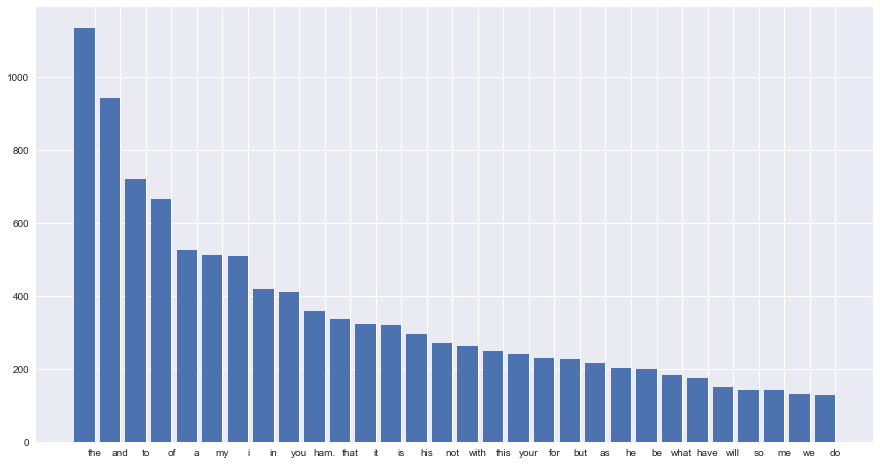

In [88]:
topfreq=L1[:30]
print topfreq
plt.figure(figsize=(15,8))
pos = np.arange(len(topfreq))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos+0.4, [e[0] for e in topfreq]);